In [1]:
import pandas as pd  #manipulate dataframe
import numpy as np   
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Data Wrangling: clean, missing values, duplicate, label encoding, correlation, normalization, data types, dates
# Data Visualization: skewness, distribution, relationship between variables, outliers, 


In [3]:
data = pd.read_csv("Credit Risk Analysi ML bootcamp.csv",index_col=None)

In [4]:
data.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount (in lac),Duration,Purpose,Risk,Income,Childern Count,Income Type,Education Type,Has a phone,Has a email id,Occupation Type
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good,202500.0,0,Working,Secondary / secondary special,1,0,Laborers
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,270000.0,0,State servant,Higher education,1,0,Core staff
2,2,49,male,1,own,little,NaN,2096,12,education,good,67500.0,0,Working,Secondary / secondary special,1,0,Laborers
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good,135000.0,0,Working,Secondary / secondary special,0,0,Laborers
4,4,53,male,2,free,little,little,4870,24,car,bad,121500.0,0,Working,Secondary / secondary special,0,0,Core staff


In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.shape #(rows, columns)

(1000, 18)

In [7]:
data.columns

Index(['Id', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount (in lac)', 'Duration', 'Purpose',
       'Risk', 'Income', 'Childern Count', 'Income Type', 'Education Type',
       'Has a phone', 'Has a email id', 'Occupation Type'],
      dtype='object')

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      1000 non-null   int64  
 1   Age                     1000 non-null   int64  
 2   Sex                     1000 non-null   object 
 3   Job                     1000 non-null   int64  
 4   Housing                 1000 non-null   object 
 5   Saving accounts         817 non-null    object 
 6   Checking account        606 non-null    object 
 7   Credit amount (in lac)  1000 non-null   int64  
 8   Duration                1000 non-null   int64  
 9   Purpose                 1000 non-null   object 
 10  Risk                    1000 non-null   object 
 11  Income                  1000 non-null   float64
 12  Childern Count          1000 non-null   int64  
 13  Income Type             1000 non-null   object 
 14  Education Type          1000 non-null   o

In [10]:
data.nunique()

Id                        1000
Age                         53
Sex                          2
Job                          4
Housing                      3
Saving accounts              4
Checking account             3
Credit amount (in lac)     921
Duration                    33
Purpose                      8
Risk                         2
Income                      95
Childern Count               4
Income Type                  4
Education Type               4
Has a phone                  2
Has a email id               2
Occupation Type             18
dtype: int64

In [11]:
data.drop(['Id'],axis=1,inplace =True)

In [12]:
data.shape

(1000, 17)

In [13]:
duplicate = data[data.duplicated(subset=None,keep='first')] 
  
print("Duplicate Rows :") 
  
# Print the resultant Dataframe 
duplicate.shape 
#duplicate
#df= df.drop_duplicates() 

Duplicate Rows :


(0, 17)

#Handling missing values

In [14]:
data.isna().sum()

Age                         0
Sex                         0
Job                         0
Housing                     0
Saving accounts           183
Checking account          394
Credit amount (in lac)      0
Duration                    0
Purpose                     0
Risk                        0
Income                      0
Childern Count              0
Income Type                 0
Education Type              0
Has a phone                 0
Has a email id              0
Occupation Type           286
dtype: int64

In [15]:
data['Job'].value_counts()  

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

1. categorical --> numerical  #Job
2. Categorical --> Non numerice/string  # Saving Accounts
3. Numerical --> continuous   #Income

In [16]:
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [17]:
data['Income Type'].value_counts()

Working                 526
Commercial associate    254
Pensioner               158
State servant            62
Name: Income Type, dtype: int64

In [18]:
data['Education Type'].value_counts()

Secondary / secondary special    703
Higher education                 259
Incomplete higher                 29
Lower secondary                    9
Name: Education Type, dtype: int64

In [19]:
data['Saving accounts']
#df.Embarked.replace(np.nan, 'S', inplace = True)

0           NaN
1        little
2        little
3        little
4        little
         ...   
995      little
996      little
997      little
998      little
999    moderate
Name: Saving accounts, Length: 1000, dtype: object

## Handling Missing Values

3 ways: 
1. If value is numerical and continuous
2. If value is categorical and numerical
3. If value is categorical and text

In [20]:
# filling with most common class
#data['Saving accounts'] = data['Saving accounts'].apply(lambda x: x.fillna(x.value_counts().index[0]))
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))  #Replacing missing values with mode
data.head() 

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount (in lac),Duration,Purpose,Risk,Income,Childern Count,Income Type,Education Type,Has a phone,Has a email id,Occupation Type
0,67,male,2,own,little,little,1169,6,radio/TV,good,202500.0,0,Working,Secondary / secondary special,1,0,Laborers
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,270000.0,0,State servant,Higher education,1,0,Core staff
2,49,male,1,own,little,little,2096,12,education,good,67500.0,0,Working,Secondary / secondary special,1,0,Laborers
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,135000.0,0,Working,Secondary / secondary special,0,0,Laborers
4,53,male,2,free,little,little,4870,24,car,bad,121500.0,0,Working,Secondary / secondary special,0,0,Core staff


In [21]:
type(data['Saving accounts'])

pandas.core.series.Series

In [22]:
data['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [23]:
data['Credit amount (in lac)'].max()

18424

<AxesSubplot:xlabel='Income', ylabel='Count'>

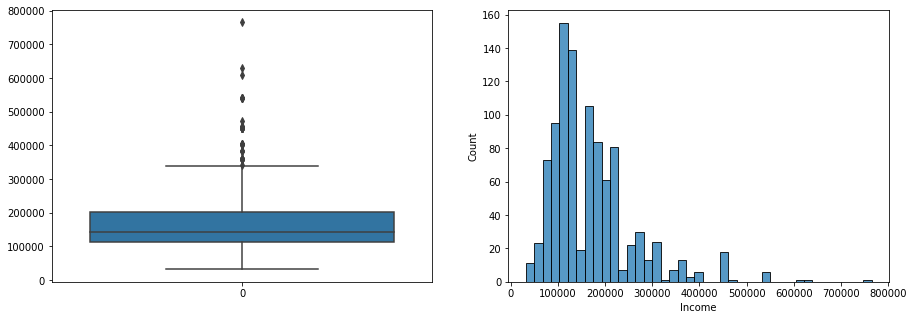

In [24]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = data["Income"])
plt.subplot(1,2,2)
sns.histplot(data["Income"])

In [25]:
#data["Income"].fillna(value=data["Income"].median(),inplace=True)

### Divide the dataframe into 3 sub dataframes: categorical string, categorical numerical, Numerical  continuous

In [26]:
numeric_data1 = data.select_dtypes(include=[np.number])
numeric_data1.columns

Index(['Age', 'Job', 'Credit amount (in lac)', 'Duration', 'Income',
       'Childern Count', 'Has a phone', 'Has a email id'],
      dtype='object')

In [27]:
cat_data1 = data.select_dtypes(exclude=[np.number])
cat_data1.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk', 'Income Type', 'Education Type', 'Occupation Type'],
      dtype='object')

In [28]:
cat_data1.head()

,Sex,Housing,Saving accounts,Checking account,Purpose,Risk,Income Type,Education Type,Occupation Type
0,male,own,little,little,radio/TV,good,Working,Secondary / secondary special,Laborers
1,female,own,little,moderate,radio/TV,bad,State servant,Higher education,Core staff
2,male,own,little,little,education,good,Working,Secondary / secondary special,Laborers
3,male,free,little,little,furniture/equipment,good,Working,Secondary / secondary special,Laborers
4,male,free,little,little,car,bad,Working,Secondary / secondary special,Core staff


In [29]:
list_num = ['Age', 'Credit amount (in lac)', 'Duration', 'Income']
numeric_data = data[list_num]

In [30]:
numeric_data.head()

,Age,Credit amount (in lac),Duration,Income
0,67,1169,6,202500.0
1,22,5951,48,270000.0
2,49,2096,12,67500.0
3,45,7882,42,135000.0
4,53,4870,24,121500.0


In [31]:
list_cat = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk', 'Income Type', 'Education Type', 'Occupation Type']

## Univariate Analysis

In [32]:
data.describe()

,Age,Job,Credit amount (in lac),Duration,Income,Childern Count,Has a phone,Has a email id
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000,167937.269655,0.406000,0.297000,0.064000
std,11.375469,0.653614,2822.736876,12.058814,90629.192315,0.713914,0.457165,0.244875
min,19.000000,0.000000,250.000000,4.000000,31500.000000,0.000000,0.000000,0.000000
25%,27.000000,2.000000,1365.500000,12.000000,112500.000000,0.000000,0.000000,0.000000
50%,33.000000,2.000000,2319.500000,18.000000,144000.000000,0.000000,0.000000,0.000000
75%,42.000000,2.000000,3972.250000,24.000000,202500.000000,1.000000,1.000000,0.000000
max,75.000000,3.000000,18424.000000,72.000000,765000.000000,3.000000,1.000000,1.000000


In [33]:
# plt.figure(figsize=(10,5))
# numeric_data.hist(figsize = (10,10))
# plt.tight_layout()

In [34]:
#Pandas, Seaborn
#Pandas: all columns together
#Seaborn: for each individual column

In [35]:
# import seaborn as sns
# sns.distplot(data["Income"])

In [36]:
data["Income"] = np.log(data["Income"])  

<AxesSubplot:xlabel='Income', ylabel='Count'>

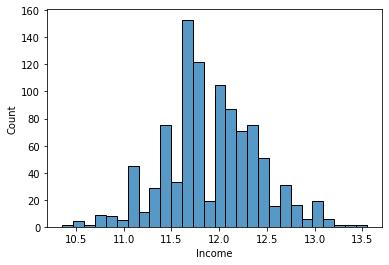

In [37]:
sns.histplot(data["Income"])  

In [38]:
numeric_data.columns

Index(['Age', 'Credit amount (in lac)', 'Duration', 'Income'], dtype='object')

# Day 2 starts here!

## Outlier detection

In [39]:
#sns.boxplot(data = numeric_data['Age'])

In [40]:
#sns.boxplot(data = numeric_data['Credit amount (in lac)'])

In [41]:
#sns.boxplot(data = numeric_data['Duration'])

In [42]:
#sns.boxplot(data = numeric_data['Income'])

In [43]:
data.shape

(1000, 17)

In [44]:
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
print(Q1 )
print(Q3 )

# Q1-1.5 * IQR  
# Q3 +  1.5 * IQR

# 25 % data --> 11.6
# 1, 2,3, 4,5 --> Q2 = 3, Q1 = 2, Q3 = 4

27.0
42.0


In [45]:
#data = data[~((data['Age'] < (Q1 - 1.5 * IQR)) |(data['Age'] > (Q3 + 1.5 * IQR)))]

In [46]:
#data.shape

In [47]:
data.shape

(1000, 17)

## Correlation

In [48]:
# plt.figure(figsize=(10,7))
# sns.heatmap(data.corr(),annot=True)

# two independent variables have high corr --> remove one 
# 1 independent and another dependent ---> keep both 
#multi-collienarity --> high corr between independent variables 
# -0.8 : two indep --> remove one |absolute value|
#heatmap ? --> data.corr()
#50 features ? then what will I do? 

# 75 % indep variables --> 

## Pairplot

In [49]:
#sns.pairplot(numeric_data)

In [50]:
#data.columns

In [51]:
# import seaborn as sns
# sns.regplot(x="Income",y='Age',data=data)  #y = mx + c 

In [52]:
#sns.lineplot(x="Income", y="Credit amount (in lac)", hue="Risk",data=data)

## Analysis of each categorical colmun

In [53]:
#list_cat

In [54]:
# bar graph 
# pie chart >> 360 degree
# 3 types fruits --> 10 apples, 30 organge, 50 grapes
# 40 categories --> 

In [55]:
#sns.countplot(data["Sex"])

In [56]:
#sns.countplot(data["Housing"])

In [57]:
#sns.countplot(data["Checking account"])

In [58]:
#sns.countplot(data["Risk"])

In [59]:
#sns.countplot(data["Purpose"])
#sns.set(rc={'figure.figsize':(25.7,8.27)})


In [60]:
#sns.countplot(data["Income Type"])

In [61]:
#sns.countplot(data["Education Type"])

In [62]:
#sns.countplot(data["Occupation Type"])
#sns.set(rc={'figure.figsize':(25.7,10.27)})

In [63]:
#sns.countplot(data["Saving accounts"])

## Data Normalization

In [64]:
x = data[['Income']].values.astype(float)

In [65]:
data['Income'][970:1000]

970    12.100712
971    11.407565
972    10.896739
973    11.547327
974    12.261980
975    12.240474
976    11.119883
977    11.630709
978    11.967181
979    11.407565
980    11.813030
981    11.813030
982    11.722376
983    12.218495
984    11.630709
985    11.845820
986    11.813030
987    11.630709
988    11.407565
989    12.660328
990    10.563595
991    12.660328
992    11.813030
993    11.630709
994    11.407565
995    11.630709
996    12.323856
997    11.877569
998    12.660328
999    13.031977
Name: Income, dtype: float64

In [66]:
from sklearn import preprocessing
# Create x, where x the 'Income' column's values as floats
x = data[['Income']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data['Income'] = pd.DataFrame(x_scaled)

In [67]:
data['Income']

0      0.583328
1      0.673514
2      0.238924
3      0.456219
4      0.423189
         ...   
995    0.399063
996    0.616358
997    0.476451
998    0.721839
999    0.838347
Name: Income, Length: 1000, dtype: float64

In [68]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount (in lac)', 'Duration', 'Purpose', 'Risk', 'Income',
       'Childern Count', 'Income Type', 'Education Type', 'Has a phone',
       'Has a email id', 'Occupation Type'],
      dtype='object')

In [69]:
x = data[['Credit amount (in lac)']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data['Credit amount (in lac)'] = pd.DataFrame(x_scaled)

In [70]:
cat_data1.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk', 'Income Type', 'Education Type', 'Occupation Type'],
      dtype='object')

In [71]:
data['Housing'].value_counts()  # H0, L1 , M 2---> H0 M1 L 2

# own --> 1, other --> 0 
#20 cat --> 40 columns 

own     713
rent    179
free    108
Name: Housing, dtype: int64

## Label Encoding

In [72]:
from sklearn.preprocessing import LabelEncoder
data['Sex'] = LabelEncoder().fit_transform(data['Sex'].astype(str))
data['Housing'] = LabelEncoder().fit_transform(data['Housing'].astype(str))
data['Saving accounts'] = LabelEncoder().fit_transform(data['Saving accounts'].astype(str))
data['Checking account'] = LabelEncoder().fit_transform(data['Checking account'].astype(str))
data['Purpose'] = LabelEncoder().fit_transform(data['Purpose'].astype(str))
data['Risk'] = LabelEncoder().fit_transform(data['Risk'].astype(str))
data['Income Type'] = LabelEncoder().fit_transform(data['Income Type'].astype(str))
data['Education Type'] = LabelEncoder().fit_transform(data['Education Type'].astype(str))
data['Occupation Type'] = LabelEncoder().fit_transform(data['Occupation Type'].astype(str))

In [73]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount (in lac),Duration,Purpose,Risk,Income,Childern Count,Income Type,Education Type,Has a phone,Has a email id,Occupation Type
0,67,1,2,1,0,0,0.050567,6,5,1,0.583328,0,3,3,1,0,8
1,22,0,2,1,0,1,0.313690,48,5,0,0.673514,0,2,0,1,0,3
2,49,1,1,1,0,0,0.101574,12,3,1,0.238924,0,3,3,1,0,8
3,45,1,2,0,0,0,0.419941,42,4,1,0.456219,0,3,3,0,0,8
4,53,1,2,0,0,0,0.254209,24,1,0,0.423189,0,3,3,0,0,3


In [74]:
#dummy_variable_1 = pd.get_dummies(data["Income Type"])
#dummy_variable_1.head()
# merge data frame "data" and "dummy_variable_1" 
#data = pd.concat([data, dummy_variable_1], axis=1)

# drop original column "Income Type" from "data"
#data.drop("Income Type", axis = 1, inplace=True)


In [75]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount (in lac)', 'Duration', 'Purpose', 'Risk', 'Income',
       'Childern Count', 'Income Type', 'Education Type', 'Has a phone',
       'Has a email id', 'Occupation Type'],
      dtype='object')

In [76]:
data.drop("Has a phone", axis = 1, inplace=True)
data.drop("Has a email id", axis = 1, inplace=True)

## Day 5

## Feature Engineering Methods

1. Filter Method
2. Embedded Method
3. Wrapper Method

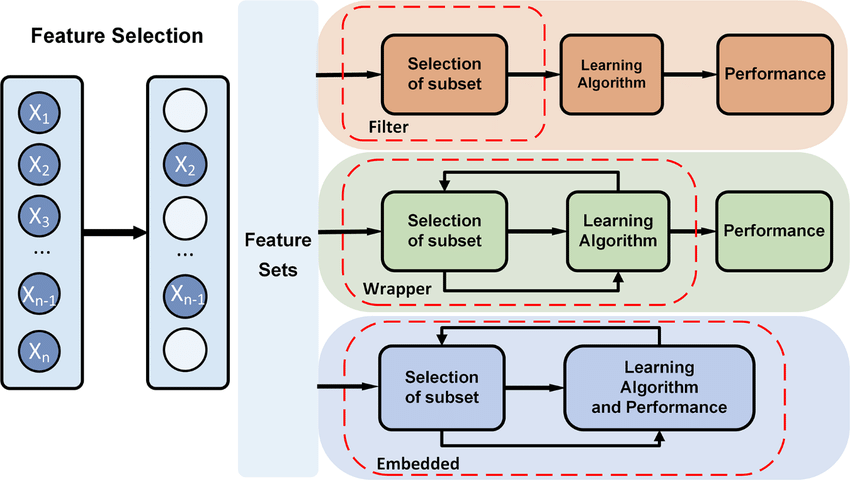

## Use of each feature selection technique

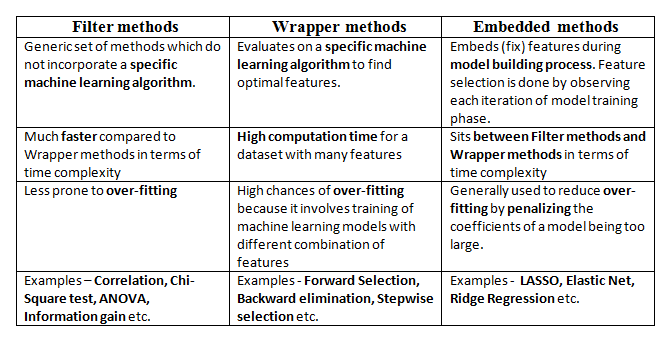

In [77]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName1=corr_matrix.columns[i] #getting the column name
                colName2=corr_matrix.columns[j] #getting the column name
                col_corr.add(colName1) #adding the correlated column name heigher than threshold value.
                col_corr.add(colName2)
    return col_corr #returning set of column names


In [78]:
col=correlation(numeric_data,0.60)
print('Correlated columns:',col)

Correlated columns: {'Credit amount (in lac)', 'Duration'}


In [79]:
data.drop(['Duration'],axis=1,inplace =True)

In [80]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount (in lac)', 'Purpose', 'Risk', 'Income', 'Childern Count',
       'Income Type', 'Education Type', 'Occupation Type'],
      dtype='object')

In [81]:
data.shape

(1000, 14)

In [82]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount (in lac),Purpose,Risk,Income,Childern Count,Income Type,Education Type,Occupation Type
0,67,1,2,1,0,0,0.050567,5,1,0.583328,0,3,3,8
1,22,0,2,1,0,1,0.313690,5,0,0.673514,0,2,0,3
2,49,1,1,1,0,0,0.101574,3,1,0.238924,0,3,3,8
3,45,1,2,0,0,0,0.419941,4,1,0.456219,0,3,3,8
4,53,1,2,0,0,0,0.254209,1,0,0.423189,0,3,3,3


## Chi Square Test

### ## Is there a significant relationship between Education type and Credit risk?

We will use a chi-square test to test this as both are categorical variables.

Null Hypothesis: There is no significant relationship between Education Type and Credit Risk.
    
Alternative Hypothesis: There is a significant relationship between Credit Risk and Education Type

In [83]:
crosstab = pd.crosstab(data["Education Type"],data['Risk'])
crosstab

Risk,0,1
Education Type,,
0,79,180
1,8,21
2,5,4
3,208,495


We can simply pass the crosstab variable through the chi2_contingency() method to conduct a Chi-square test of independence.The first value is the Chi-square value, followed by the p-value , then comes the degrees of freedom , and lastly it outputs the expected frequencies as an array. 

In [84]:
import scipy.stats as stats
chi_sq,p ,dof ,expected = stats.chi2_contingency(crosstab)

In [85]:
print("P-value for chi-sqaure test is = {}".format(p))

P-value for chi-sqaure test is = 0.39667254822423936


Since p-value is much greater than alpha=0.05, we fail to reject the null hypothesis. So we can conclude that there is no evidence of a significant relationship between Education Type and Risk.

## Feature Selection using Wrapper Method

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = data.drop(['Risk'],axis=1)
y = data['Risk']

In [89]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
model=sfs(RandomForestRegressor(),k_features=10,forward=True,verbose=5,cv=5,n_jobs=-1,scoring='r2')
model.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  13 | elapsed:   22.0s remaining:    9.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   24.3s finished

[2022-03-01 10:37:26] Features: 1/10 -- score: 0.02166188523349708[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:    7.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   11.3s finished

[2022-03-01 10:37:37] Features: 2/10 -- score: 0.019298515050210387[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  11 | elapsed:    7.0s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   10.0s finished

[2022-03-01 10:37:47] Features: 3/10 -- score: 0.003386379913684179[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out o

SequentialFeatureSelector(estimator=RandomForestRegressor(), k_features=10,
                          n_jobs=-1, scoring='r2', verbose=5)

In [110]:
#Get the column name for the selected feature.
model.k_feature_names_

('Age',
 'Sex',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount (in lac)',
 'Purpose',
 'Childern Count',
 'Income Type',
 'Education Type')

In [91]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount (in lac)', 'Purpose', 'Risk', 'Income', 'Childern Count',
       'Income Type', 'Education Type', 'Occupation Type'],
      dtype='object')

### backward feature selection

In [92]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestRegressor
backwardModel=sfs(RandomForestRegressor(),k_features=10,forward=False,verbose=5,cv=5,n_jobs=-1,scoring='r2')
backwardModel.fit(np.array(X_train),y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 out of  13 | elapsed:   17.6s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:   21.4s finished

[2022-03-01 10:39:12] Features: 12/10 -- score: -0.036273240138348276[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  12 | elapsed:   11.3s remaining:    5.6s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   17.4s finished

[2022-03-01 10:39:29] Features: 11/10 -- score: -0.020930888759727685[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  11 | elapsed:   11.0s remaining:    6.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:   15.9s finished

[2022-03-01 10:39:45] Features: 10/10 -- score: -0.03285817546083829

SequentialFeatureSelector(estimator=RandomForestRegressor(), forward=False,
                          k_features=10, n_jobs=-1, scoring='r2', verbose=5)

In [93]:
X_train.columns[list(backwardModel.k_feature_idx_)]

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Credit amount (in lac)', 'Purpose', 'Income Type', 'Education Type',
       'Occupation Type'],
      dtype='object')

- age
- Sex
- Job
- Saving accounts 
- Credit amount
- Purpose
- Income type
- Education type
- Childern Count

In [94]:
'''from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs
emodel=efs(RandomForestRegressor(),min_features=1,max_features=10,scoring='r2',n_jobs=-1)

emodel.fit(X_train,y_train)'''

"from mlxtend.feature_selection import ExhaustiveFeatureSelector as efs\nemodel=efs(RandomForestRegressor(),min_features=1,max_features=10,scoring='r2',n_jobs=-1)\n\nemodel.fit(X_train,y_train)"

In [95]:
#Get the column name for the selected feature.
#X_train.columns[list(emodel.best_idx_)]

## Feature Selection using Genetic Algorithm

In [96]:
#!pip install sklearn-genetic

In [97]:
#from genetic_selection import GeneticSelectionCV

In [98]:
# from sklearn import linear_model
# #from sklearn.ensemble import RandomForestRegressor

# from genetic_selection import GeneticSelectionCV
# estimator = linear_model.LinearRegression()

# selector = GeneticSelectionCV(estimator,cv=5,  #CV 
#                                   verbose=1,
#                                   scoring="r2",
#                                   max_features=5,
#                                   n_population=400,  #  400 combinations of features(random) + total combinations
#                                   crossover_proba=0.5,
#                                   mutation_proba=0.2,
#                                   n_generations=40,
#                                   crossover_independent_proba=0.5,
#                                   mutation_independent_proba=0.05,
#                                   tournament_size=3,
#                                   n_gen_no_change=10,
#                                   caching=True,
#                                   n_jobs=-1)


In [99]:
# selector = selector.fit(x_train, y_train)

# print(selector.support_)

In [100]:
data.shape

(1000, 14)

In [101]:
data.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount (in lac)', 'Purpose', 'Risk', 'Income', 'Childern Count',
       'Income Type', 'Education Type', 'Occupation Type'],
      dtype='object')

age
Sex
Job
Saving accounts
Credit amount
Purpose
Income type
Income 
Education type
Childern Count

In [102]:
data.drop(["Housing", "Checking account", "Occupation Type"], axis = 1, inplace=True)

In [111]:
data.columns

Index(['Age', 'Sex', 'Job', 'Saving accounts', 'Credit amount (in lac)',
       'Purpose', 'Risk', 'Income', 'Childern Count', 'Income Type',
       'Education Type'],
      dtype='object')

In [115]:
X_final = data.drop(['Risk'],axis=1)
y_final = data['Risk']

In [116]:

X_train,X_test ,y_train,y_test =  train_test_split(X_final, y_final, test_size=0.2, random_state=42)

In [117]:
print(X_train.shape)
print(X_test.shape)

(800, 10)
(200, 10)


In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [121]:
rf = RandomForestClassifier()

In [122]:
rf_model = rf.fit(X_train,y_train)

In [123]:
print('f1_score:', f1_score(y_test, rf_model.predict(X_test)))

f1_score: 0.8025078369905956


In [131]:
sample = np.array([[37,1,2,1,0.4567,0,0.89674,0,0,1]])

In [125]:
data.columns

Index(['Age', 'Sex', 'Job', 'Saving accounts', 'Credit amount (in lac)',
       'Purpose', 'Risk', 'Income', 'Childern Count', 'Income Type',
       'Education Type'],
      dtype='object')

In [132]:
rf_model.predict_proba(sample)

array([[0.53, 0.47]])

In [133]:
X_train

,Age,Sex,Job,Saving accounts,Credit amount (in lac),Purpose,Income,Childern Count,Income Type,Education Type
29,63,1,2,0,0.362386,0,0.329109,0,3,0
535,33,1,2,0,0.113844,3,0.358988,0,0,0
695,50,1,2,2,0.054253,1,0.504544,2,0,1
557,29,0,2,0,0.261527,1,0.329109,0,1,0
836,21,0,2,0,0.034995,5,0.504544,0,2,3
...,...,...,...,...,...,...,...,...,...,...
106,39,1,3,0,0.341587,1,0.434590,0,1,3
270,32,1,2,0,0.132717,1,0.321172,0,1,0
860,27,1,2,3,0.305601,1,0.616358,1,3,3
435,25,1,2,0,0.067899,5,0.583328,0,0,0


In [134]:
import pickle 

In [138]:
pickle.dump(rf_model,open('rf_model.pkl','wb'))